In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
BOW = pd.read_csv('./Datasets/resultados_concatenados_com_BOW.csv')
TFIDF = pd.read_csv('./Datasets/resultados_concatenados_com_TFIDF.csv')
DOC2VEC = pd.read_csv('./Datasets/resultados_concatenados_com_doc2vec.csv')

In [4]:
TFIDF.Nota.max()

93.89617553242232

In [12]:
resultados = pd.concat([BOW, TFIDF, DOC2VEC], axis=0)
resultados.to_csv("./Datasets/resultados_final.csv", index=False)

In [13]:
resultados

,Accuracy,F1-Score,MCC,Nota,Tecnica,Modelo,Metodo
0,89.542169,88.843188,79.094486,86.580757,Random Undersampler,KNN,BoW
1,89.686747,88.629118,79.706880,86.662966,NearMiss,KNN,BoW
2,98.851273,59.880240,59.736134,69.586972,OneSidedSelection,KNN,BoW
3,89.903519,90.376310,80.265225,87.730341,Random Oversampler,KNN,BoW
4,91.213701,90.682280,82.891832,88.867523,SMOTE,KNN,BoW
...,...,...,...,...,...,...,...
25,91.421687,91.231527,82.896695,89.195359,Random Undersampler,NN,DOC2VEC
26,97.638554,97.541395,95.269767,96.997778,NearMiss,NN,DOC2VEC
27,99.270745,76.473552,76.106091,82.080985,OneSidedSelection,NN,DOC2VEC
28,99.311640,99.311776,98.626432,99.140406,Random Oversampler,NN,DOC2VEC


In [14]:
# Carregar os dados (substitua 'your_file_path.csv' pelo caminho do seu arquivo)
file_path = './Datasets/resultados_final.csv'
spreadsheet = pd.read_csv(file_path)

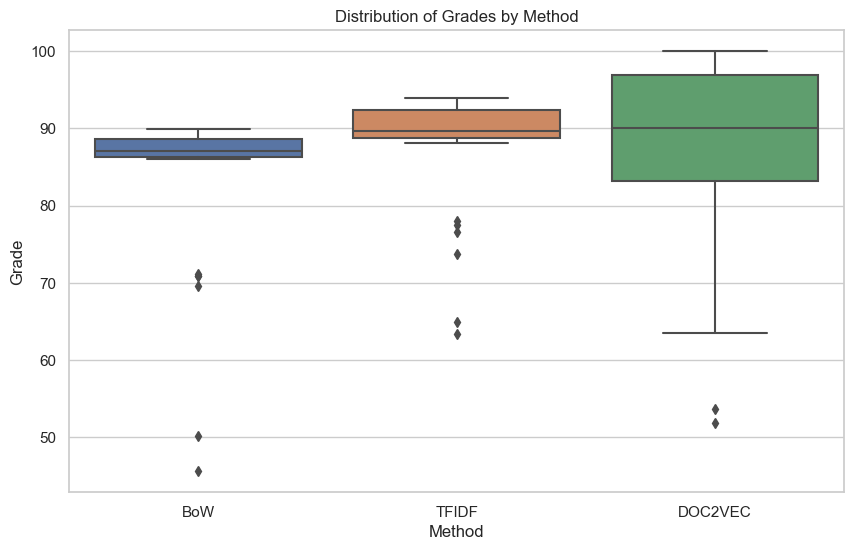

In [15]:
# Configurando o estilo estético dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de caixa para as notas
plt.figure(figsize=(10, 6))
sns.boxplot(data=spreadsheet, x='Metodo', y='Nota')
plt.title('Distribution of Grades by Method')
plt.xlabel('Method')
plt.ylabel('Grade')
plt.show()


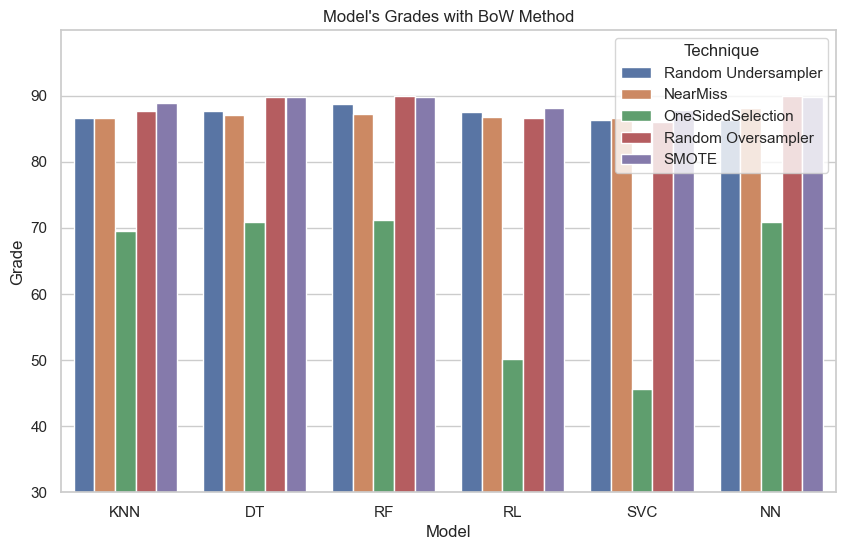

In [16]:

# Filtrar os dados para o método BoW
bow_data = spreadsheet[spreadsheet['Metodo'] == 'BoW']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=bow_data, x='Modelo', y='Nota', hue='Tecnica')

plt.title('Model\'s Grades with BoW Method')
plt.xlabel('Model')
plt.ylabel('Grade')
plt.ylim(30, 99.9) # Limitando o eixo y para destacar a variação de 89% a 92%
plt.legend(title='Technique')
plt.show()


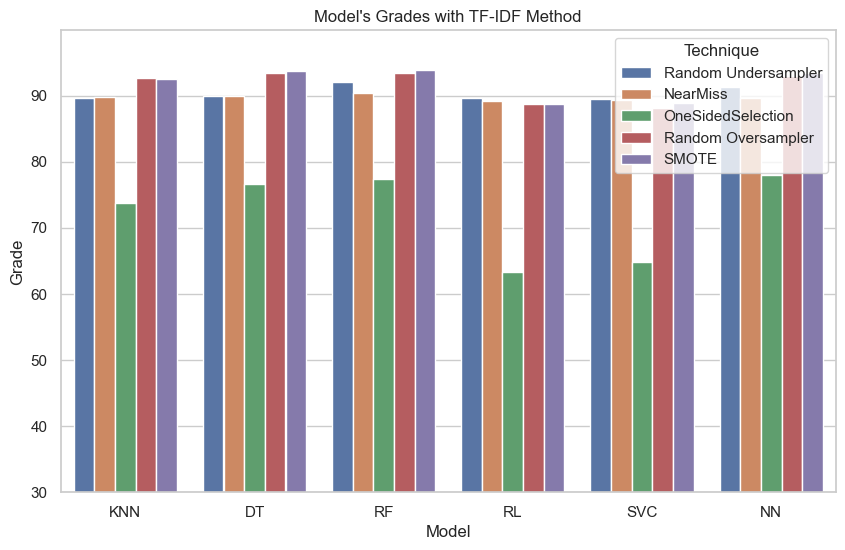

In [17]:

# Filtrar os dados para o método BoW
bow_data = spreadsheet[spreadsheet['Metodo'] == 'TFIDF']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=bow_data, x='Modelo', y='Nota', hue='Tecnica')
plt.title('Model\'s Grades with TF-IDF Method')
plt.xlabel('Model')
plt.ylabel('Grade')
plt.ylim(30, 99.9) # Limitando o eixo y para destacar a variação de 89% a 92%
plt.legend(title='Technique')
plt.show()


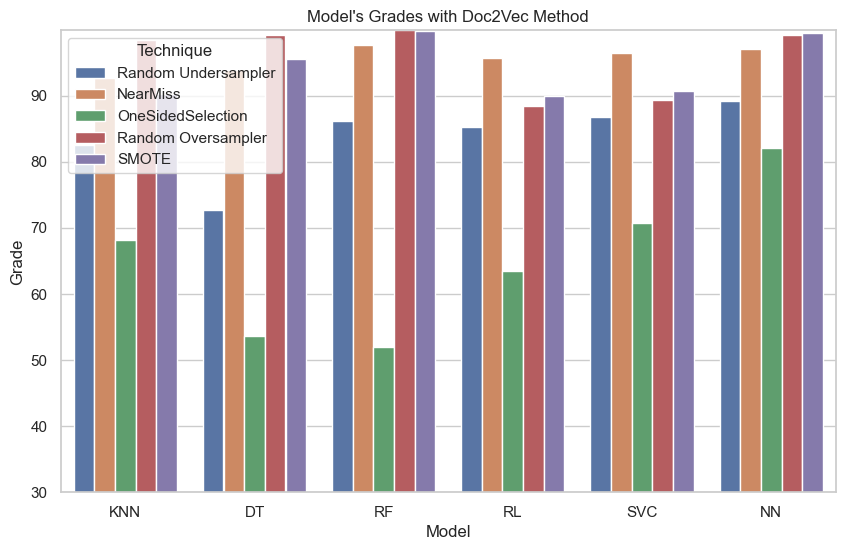

In [18]:

# Filtrar os dados para o método BoW
bow_data = spreadsheet[spreadsheet['Metodo'] == 'DOC2VEC']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=bow_data, x='Modelo', y='Nota', hue='Tecnica')
plt.title('Model\'s Grades with Doc2Vec Method')
plt.xlabel('Model')
plt.ylabel('Grade')
plt.ylim(30, 99.9) # Limitando o eixo y para destacar a variação de 89% a 92%
plt.legend(title='Technique')
plt.show()


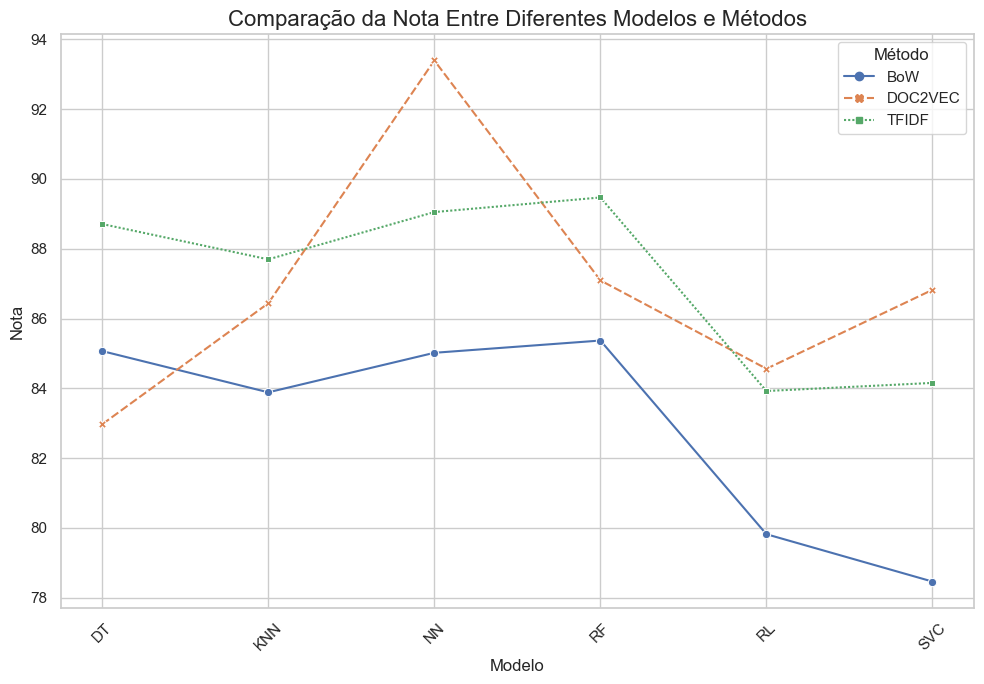

In [19]:

# Utilizando pivot_table para organizar os dados de Nota para todos os métodos
nota_pivot_data = spreadsheet.pivot_table(index='Modelo', columns='Metodo', values='Nota', aggfunc='mean')

# Configurações para os gráficos
sns.set(style="whitegrid")

# Criando o gráfico de linhas para comparar a Nota entre diferentes modelos e métodos
plt.figure(figsize=(10, 7))
plt.title("Comparação da Nota Entre Diferentes Modelos e Métodos", fontsize=16)
sns.lineplot(data=nota_pivot_data, markers=True)
plt.ylabel('Nota')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.legend(title='Método', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


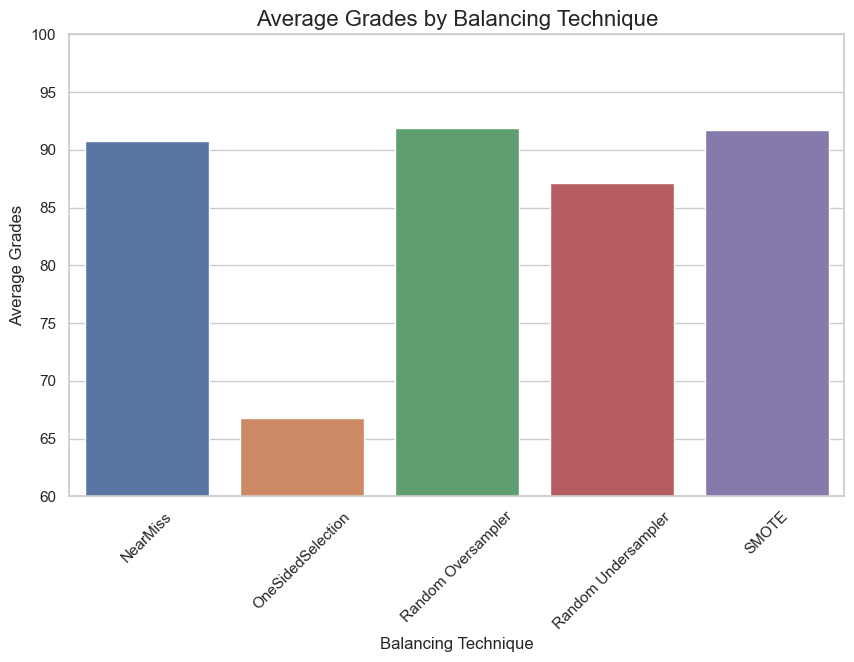

In [20]:

# Calculando a média das Notas para cada técnica de balanceamento
mean_notes = spreadsheet.groupby('Tecnica')['Nota'].mean().reset_index()

# Configurações para os gráficos
sns.set(style="whitegrid")

# Criando o gráfico de barras para as médias das Notas por técnica de balanceamento
plt.figure(figsize=(10, 6))
plt.title("Average Grades by Balancing Technique", fontsize=16)
sns.barplot(data=mean_notes, x='Tecnica', y='Nota')
plt.xlabel('Balancing Technique')
plt.ylabel('Average Grades')
plt.ylim(60, 100)  # Definindo a faixa do eixo y entre 60 e 100
plt.xticks(rotation=45)
plt.show()
